<a href="https://colab.research.google.com/github/BrunooPorto/TreinoIA01/blob/main/TreinandoIA01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel("/content/ANN Exercicio 1.xlsx")
df

,x1,x2,y,tt
0,0.0,0.0,0,tr
1,0.0,2.0,2,tr
2,0.0,4.0,4,tr
3,0.0,6.0,6,tr
4,2.0,0.0,2,tr
5,2.0,2.0,4,tr
6,2.0,4.0,6,tr
7,2.0,6.0,8,tr
8,4.0,0.0,4,tr
9,4.0,2.0,6,tr


In [ ]:
df.describe().round(2)

,x1,x2,y
count,41.00,41.00,41.00
mean,3.00,3.00,6.00
std,1.76,1.76,2.49
min,0.00,0.00,0.00
25%,1.50,1.50,4.00
50%,3.00,3.00,6.00
75%,4.50,4.50,8.00
max,6.00,6.00,12.00


In [ ]:
x_train = df.iloc[0:16,0:2].astype(float)
y_train = df.iloc[0:16,2].astype(float)
x_val = df.iloc[16:25,0:2].astype(float)
y_val = df.iloc[16:25,2].astype(float)
x_test = df.iloc[25:41,0:2].astype(float)
y_test = df.iloc[25:41,2].astype(float)

In [ ]:
print('quantidade de dados de treino:',len(x_train))
print('quantidade de dados de teste:',len(x_test))
print('quantidade de dados de validação',len(x_val))

quantidade de dados de treino: 16
quantidade de dados de teste: 16
quantidade de dados de validação 9


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import random
from tf_keras import Model
from tf_keras import layers, models, optimizers

In [ ]:
model = models.Sequential()

In [ ]:
#Camada de Entrada
input_layer = layers.Input(shape=(2),name='Input_layer')

#camada Intermediária 1 (escondida 1)
hidden_layer_1 = layers.Dense(10, activation='sigmoid', name='Hidden_layer_1')(input_layer)

#Camada Intermediária 2 (escondida 2)
hidden_layer_2 = layers.Dense(10, activation='sigmoid', name='Hidden_layer_2')(hidden_layer_1)

#camada de saida
output_layer = layers.Dense(1, activation='linear', name='Output_layer')(hidden_layer_2)

#construindo o modelo
model = models.Model(inputs=input_layer , outputs=output_layer)

#resumo do modelo
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 Hidden_layer_1 (Dense)      (None, 10)                30        
                                                                 
 Hidden_layer_2 (Dense)      (None, 10)                110       
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.5)

In [ ]:
model.compile(loss='mse', optimizer=optimizer)

In [ ]:
# Verificando as formas dos dados de entrada
print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de x_val:", x_val.shape)
print("Forma de y_val:", y_val.shape)


Forma de x_train: (16, 2)
Forma de y_train: (16,)
Forma de x_val: (9, 2)
Forma de y_val: (9,)


In [ ]:
# Treinando o modelo
history = model.fit(x_train, y_train, epochs=500, batch_size=1, validation_data=(x_val, y_val), shuffle=True, verbose=1)


Epoch 1/500
16/16 [==============================] - 3s 62ms/step - loss: 20.1886 - val_loss: 4.8231
Epoch 2/500
16/16 [==============================] - 0s 18ms/step - loss: 9.5966 - val_loss: 4.8572
Epoch 3/500
16/16 [==============================] - 0s 15ms/step - loss: 9.0196 - val_loss: 4.2531
Epoch 4/500
16/16 [==============================] - 0s 21ms/step - loss: 7.8694 - val_loss: 3.6778
Epoch 5/500
16/16 [==============================] - 0s 22ms/step - loss: 6.7245 - val_loss: 2.7263
Epoch 6/500
16/16 [==============================] - 0s 8ms/step - loss: 5.5434 - val_loss: 2.2729
Epoch 7/500
16/16 [==============================] - 0s 20ms/step - loss: 4.1795 - val_loss: 2.0558
Epoch 8/500
16/16 [==============================] - 0s 11ms/step - loss: 2.7622 - val_loss: 0.8547
Epoch 9/500
16/16 [==============================] - 0s 8ms/step - loss: 1.9947 - val_loss: 0.9536
Epoch 10/500
16/16 [==============================] - 0s 8ms/step - loss: 1.5331 - val_loss: 1.5744
E

In [ ]:
y_pred_test = model.predict(x_test)
y_pred_test

1/1 [==============================] - 0s 275ms/step


array([[2.839704 ],
       [3.8973103],
       [4.961548 ],
       [5.9655094],
       [3.8717492],
       [4.822935 ],
       [5.863871 ],
       [6.911361 ],
       [4.96225  ],
       [5.869546 ],
       [6.884692 ],
       [7.9553804],
       [6.019602 ],
       [6.9638653],
       [7.995923 ],
       [9.097933 ]], dtype=float32)

In [ ]:
y_pred_val = model.predict(x_val)
y_pred_val

1/1 [==============================] - 0s 33ms/step


array([[ 1.8194563],
       [ 3.989235 ],
       [ 5.9526963],
       [ 3.9762604],
       [ 5.8301196],
       [ 7.916628 ],
       [ 6.0374017],
       [ 7.984966 ],
       [10.152424 ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, mean_absolute_percentage_error

print('MAPE_test:', round(mean_absolute_percentage_error(y_test, y_pred_test)*100,2),'%')
print('MAPE_val:', round(mean_absolute_percentage_error(y_val, y_pred_val)*100,2),'%')
print('R2_Score_test:', r2_score(y_test, y_pred_test))
print('R2_Score_val:', r2_score(y_val, y_pred_val))
print('MAE_test:', mean_absolute_error(y_test, y_pred_test))
print('MAE_val:', mean_absolute_error(y_val, y_pred_val))
print('MSE_test:', mean_squared_error(y_test, y_pred_test))
print('MSE_val:', mean_squared_error(y_val, y_pred_val))
print('RMSE_test:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('RMSE_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))

MAPE_test: 1.67 %
MAPE_val: 1.88 %
R2_Score_test: 0.9960469043896965
R2_Score_val: 0.9979962227576943
MAE_test: 0.08449308574199677
MAE_val: 0.08005158106486003
MSE_test: 0.00988273902575898
MSE_val: 0.010686811958963618
RMSE_test: 0.0994119662101046
RMSE_val: 0.10337703787091028


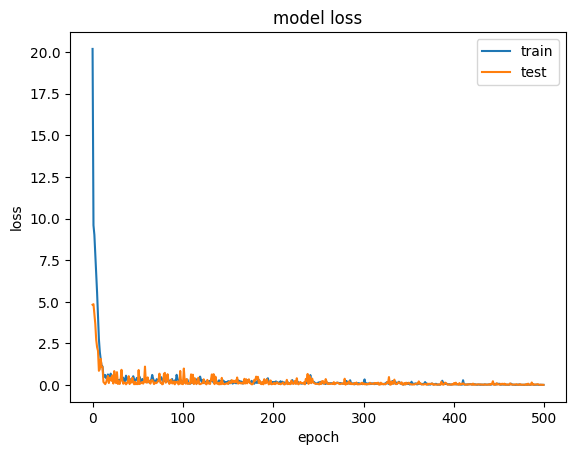

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'][0:600])
plt.plot(history.history['val_loss'][0:600])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

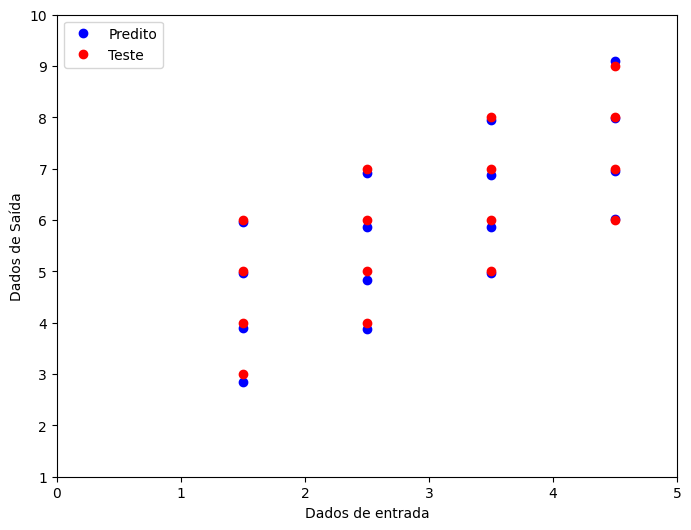

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(x_test['x1'], y_pred_test, 'o', c='b')
plt.plot(x_test['x1'], y_test, 'o', c='r')
plt.ylabel('Dados de Saída')
plt.xlabel('Dados de entrada')
plt.xticks(np.arange(0, 5 + 1, 1))
plt.yticks(np.arange(1, 10 + 1, 1))

plt.legend(loc='upper left')
plt.legend(['Predito', 'Teste'], loc='upper left')

plt.show()

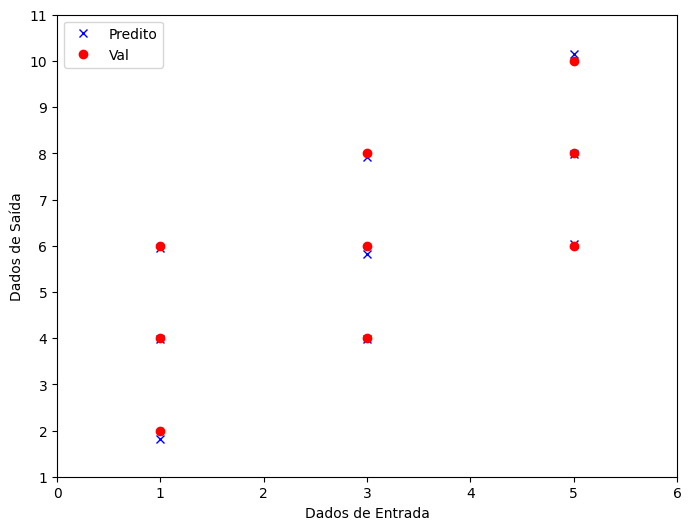

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(x_val['x1'], y_pred_val, 'x', label='Predito', c='b')
plt.plot(x_val['x1'], y_val, 'o', label='Val', c='r')

plt.ylabel('Dados de Saída')
plt.xlabel('Dados de Entrada')
plt.legend(loc='upper left')

plt.xticks(np.arange(0, 6 + 1, 1))
plt.yticks(np.arange(1, 11 + 1, 1))

plt.show()